In [1]:
from ml.classification_models import *
from ml.ml_evaluation import *
from ml.cross_corpus import *

In [2]:
dataset = 'Data/ml_dataset.csv'

In [3]:
label = 'Confusion?'

categorical_feature = ['Action']
boolean_feature = ['Decrease Explanation Level']

selected_negative_emotions = ['Distress', 'Anxiety', 'Doubt', 'Confusion', 'Disappointment', 'Anger', 'Surprise (negative)']
selected_positive_emotions = ['Interest', 'Satisfaction', 'Contentment', 'Desire']
selected_emotions = selected_negative_emotions + selected_positive_emotions

failure_reaction = (
    [f'{emotion} Max Failure' for emotion in selected_emotions] 
    + [f'{emotion} Max Failure DB' for emotion in selected_emotions] 
    + [f'{emotion} Avg Failure' for emotion in selected_emotions]
)

last_reaction = (
    [f'Last {emotion} Max Explanation' for emotion in selected_emotions]
    + [f'Last {emotion} Max Resolution' for emotion in selected_emotions]
    + [f'Last {emotion} Max Explanation DB' for emotion in selected_emotions]
    + [f'Last {emotion} Max Resolution DB' for emotion in selected_emotions]
    + [f'Last {emotion} Avg Explanation' for emotion in selected_emotions]
    + [f'Last {emotion} Avg Resolution' for emotion in selected_emotions]
)

gestures_reaction = [
    # Failure Reaction
    'Gaze on Robot Failure',
    'Gaze on Task Failure',
    'Gaze on Misc Failure',
    # Last Reaction
    'Last Gaze on Robot Explanation',
    'Last Gaze on Task Explanation',
    'Last Gaze on Misc Explanation',
    'Last Gaze on Robot Resolution',
    'Last Gaze on Task Resolution',
    'Last Gaze on Misc Resolution',
]

gestures_reaction_boolean = [
    # Failure Reaction
    'Head Titling Failure',
    'Hand touching Face / Head Failure',
    # Last Reaction
    'Last Hand touching Face / Head',
    'Last Head Titling'
]

numerical_features = last_reaction + failure_reaction + gestures_reaction
features = categorical_feature + boolean_feature + numerical_features + gestures_reaction_boolean

In [4]:
dataset = readData(dataset, numerical_features, features, label)
dataset_x = dataset[features].values
dataset_y = dataset[label].values
preprocessor = preprocess(categorical_feature, boolean_feature, numerical_features, gestures_reaction_boolean)

Count of Confused Instances: 90, Percentage: 0.20501138952164008
Count of Not Confused Instances: 349, Percentage: 0.7949886104783599


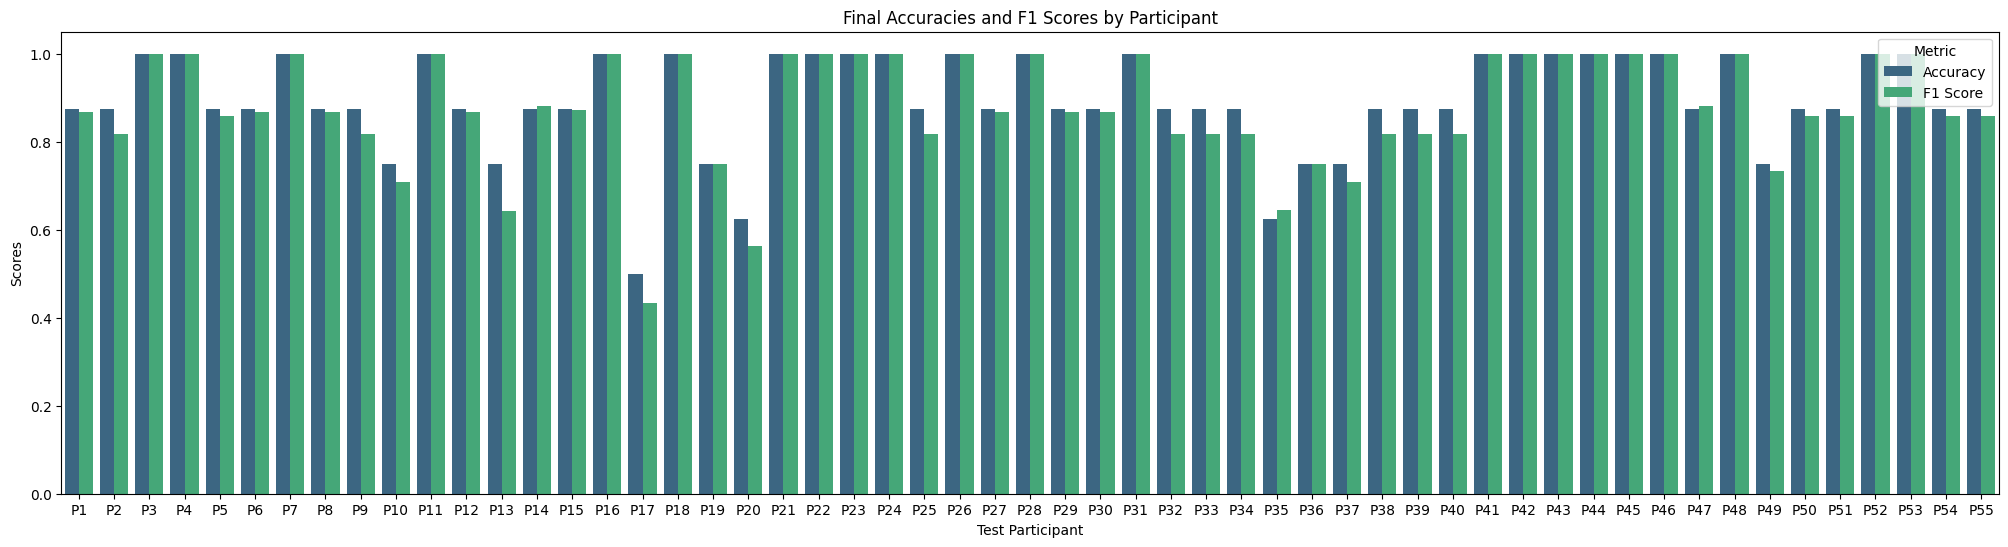

Avg Accuracy:  0.8954545454545455
Avg F1 Score:  0.8780741480741481


In [5]:
class_weights = {0:1, 1: 2}
reps = len(test_participants_all_codes)
final_accuracies = []
final_f1s = []
estimators = 20
depth = 10
leaf = 10
split = 5
for i in range(1, reps+1):
    X_train, X_test, Y_train, Y_test = split_dataset(dataset, features, label, i)
    trained_model = train_random_forest(
        features=features,
        label=label,
        preprocessor=preprocessor,
        train_x=X_train,
        train_y=Y_train,
        estimators=estimators,
        depth=depth,
        leaf=leaf,
        split=split,
        class_weights=class_weights,
        seed=seed[i],
    )

    predictions = predict(features, trained_model, X_test)
    accuracy, f1 = evaluate_full(label, predictions, Y_test)
    final_accuracies.append(accuracy)
    final_f1s.append(f1)

avg_accuracy = sum(final_accuracies) / reps
avg_f1 = sum(final_f1s) / reps

show_results(final_accuracies, final_f1s)
print(f"Avg Accuracy: ", avg_accuracy)
print(f"Avg F1 Score: ", avg_f1)

/Users/andreasnaoum/envs/Research-Project-Adaptive-Explanation-Level/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/andreasnaoum/envs/Research-Project-Adaptive-Explanation-Level/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/andreasnaoum/envs/Research-Project-Adaptive-Explanation-Level/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/andreasnaoum/envs/Research-Project-Adaptive-Explanation-Level/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'lib

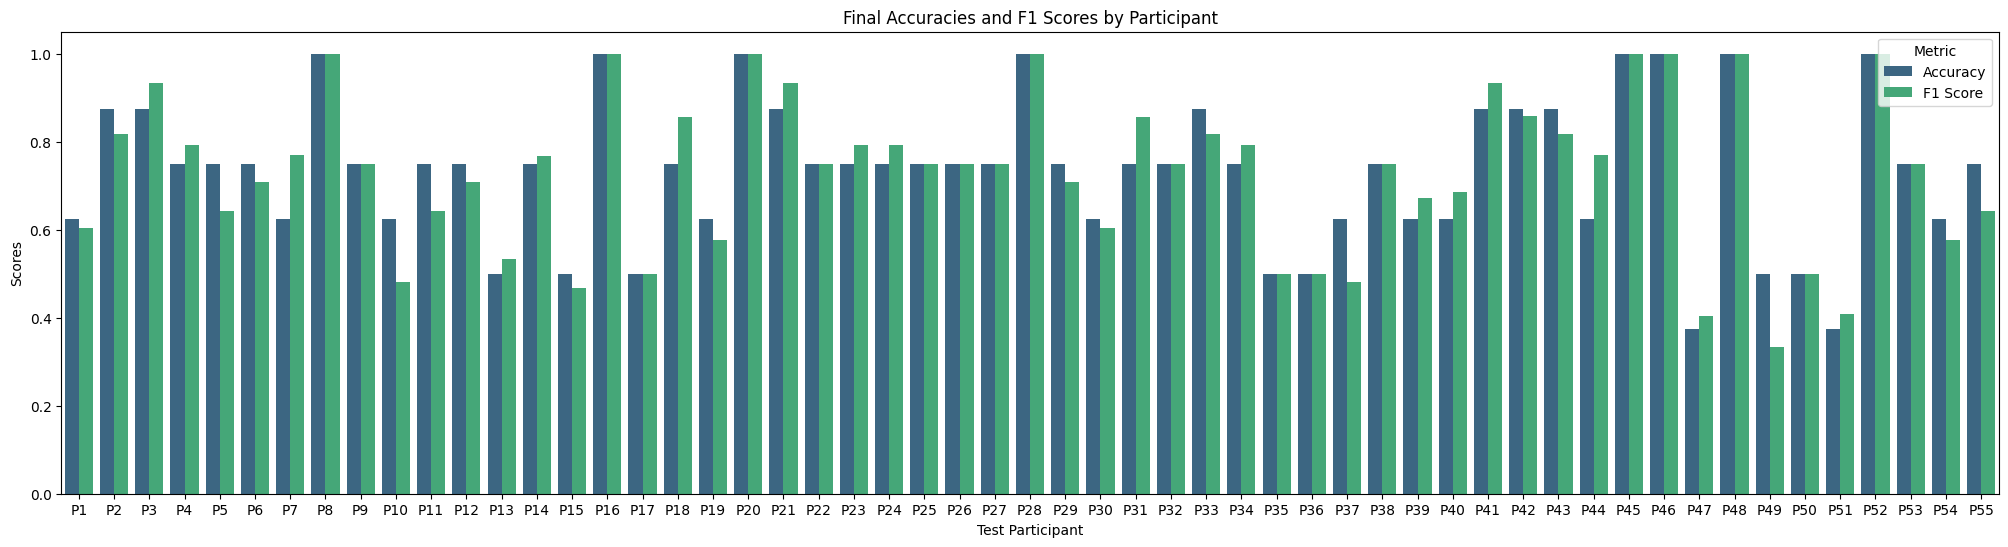

Avg Accuracy:  0.7340909090909091
Avg F1 Score:  0.7305405200859748


In [6]:
class_weights = {0:1, 1: 2}
reps = len(test_participants_all_codes)
final_accuracies = []
final_f1s = []
seed = 0
c_value = 3.0
penalty='l1'
solver='liblinear'
iters=100

for i in range(1, reps+1):
    X_train, X_test, Y_train, Y_test = split_dataset(dataset, features, label, i)
    trained_model = train_logistic_regression(
        features=features,
        label=label,
        preprocessor=preprocessor,
        train_x=X_train,
        train_y=Y_train,
        seed=seed,
        c=c_value,
        penalty=penalty,
        max_iter=iters,
        solver=solver,
        class_weights=class_weights
    )

    predictions = predict(features, trained_model, X_test)
    accuracy, f1 = evaluate_full(label, predictions, Y_test)
    final_accuracies.append(accuracy)
    final_f1s.append(f1)

avg_accuracy = sum(final_accuracies) / reps
avg_f1 = sum(final_f1s) / reps

show_results(final_accuracies, final_f1s)
print(f"Avg Accuracy: ", avg_accuracy)
print(f"Avg F1 Score: ", avg_f1)

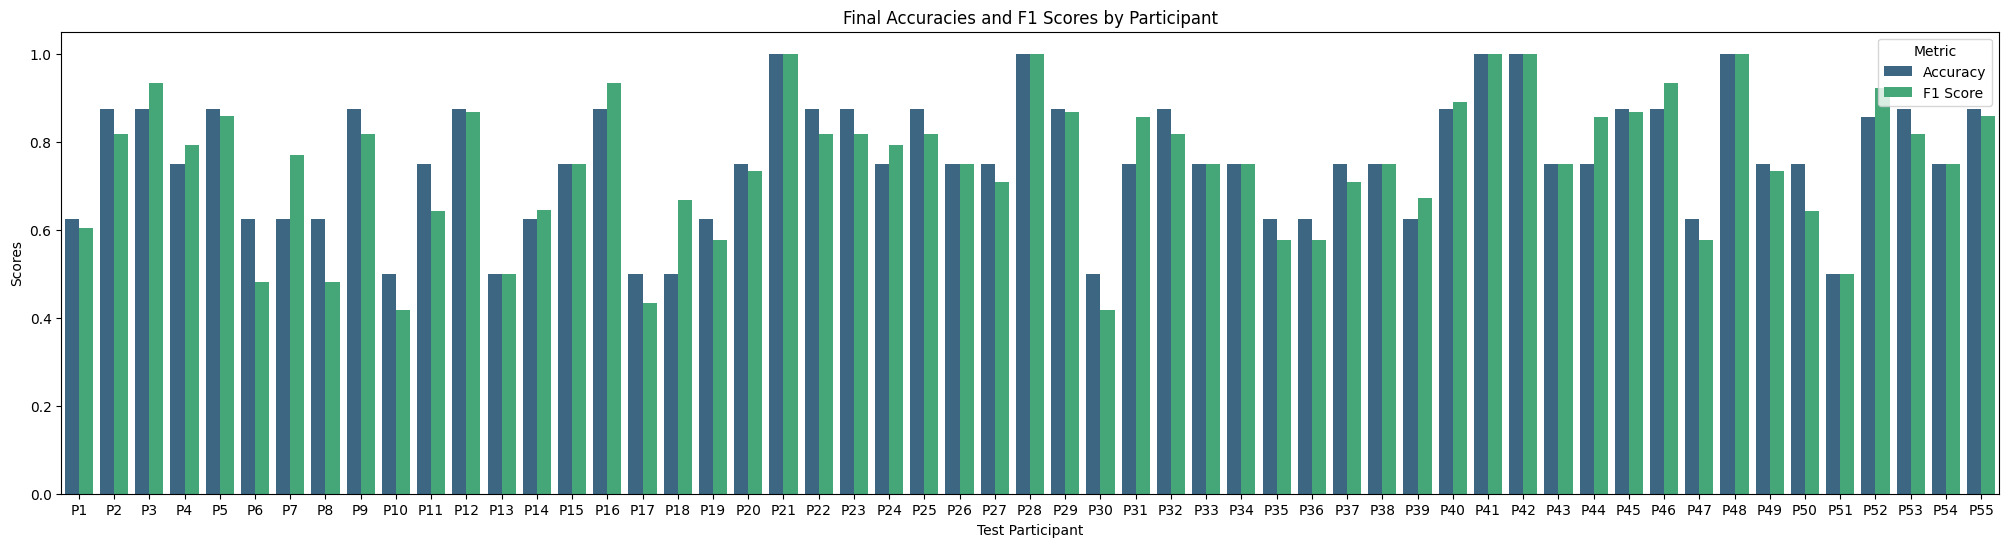

Avg Accuracy:  0.761038961038961
Avg F1 Score:  0.7502691248145793


In [7]:
class_weights = {0:1, 1: 2}
reps = len(test_participants_all_codes)
final_accuracies = []
final_f1s = []
for i in range(1, reps+1):
    X_train, X_test, Y_train, Y_test = split_dataset(dataset, features, label, i)
    trained_model = train_xgboost(
        features=features,
        label=label,
        preprocessor=preprocessor,
        train_x=X_train,
        train_y=Y_train,
        seed=1,
        colsample_bytree=0.9,
        subsample=0.9,
        max_depth=3,
        include_class_weights=True
    )

    predictions = predict(features, trained_model, X_test)
    accuracy, f1 = evaluate_full(label, predictions, Y_test)
    final_accuracies.append(accuracy)
    final_f1s.append(f1)

avg_accuracy = sum(final_accuracies) / reps
avg_f1 = sum(final_f1s) / reps

show_results(final_accuracies, final_f1s)
print(f"Avg Accuracy: ", avg_accuracy)
print(f"Avg F1 Score: ", avg_f1)

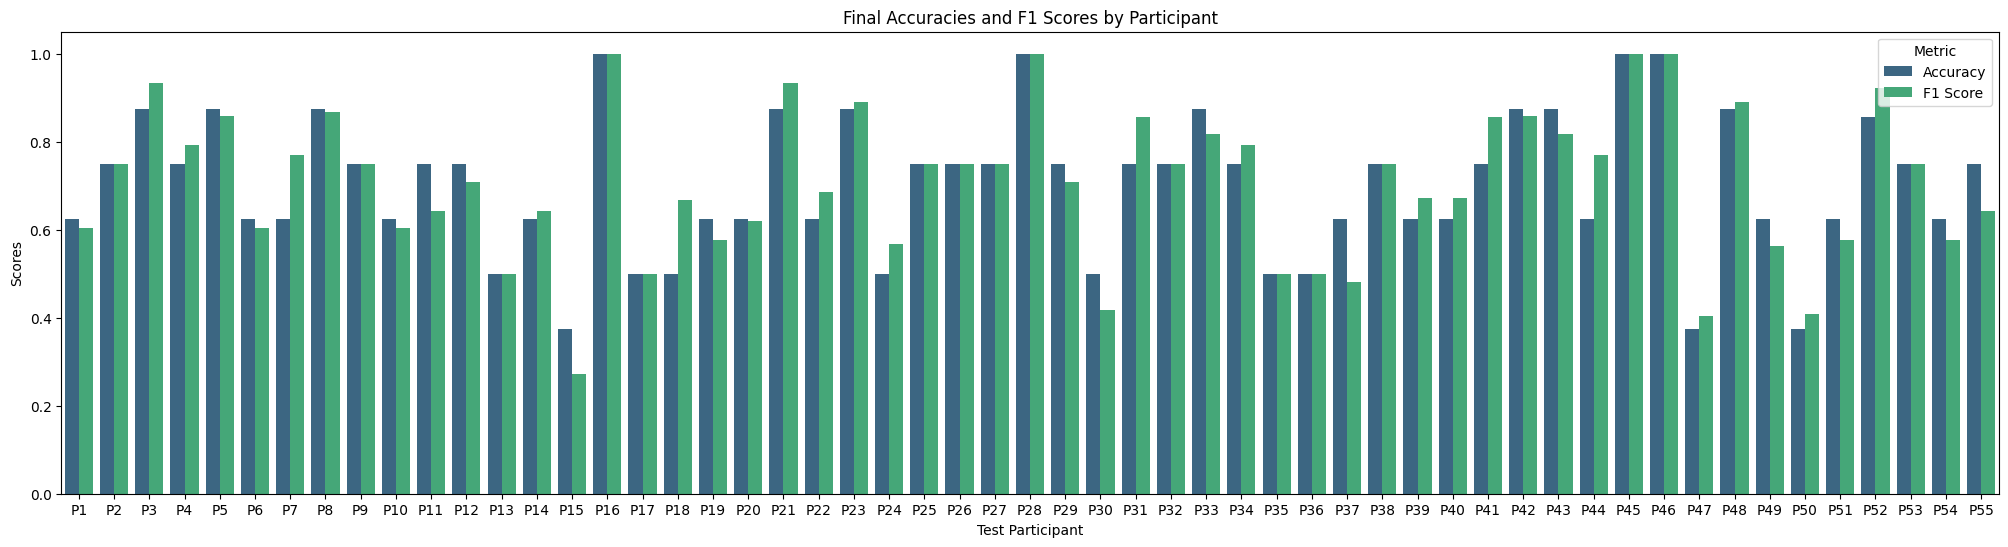

Avg Accuracy:  0.7042207792207792
Avg F1 Score:  0.7081733418097055


In [8]:
class_weights = {0:1, 1: 2}
reps = len(test_participants_all_codes)
final_accuracies = []
final_f1s = []
c = 3
seed = 1
tol = 0.1
for i in range(1, reps+1):
    X_train, X_test, Y_train, Y_test = split_dataset(dataset, features, label, i)
    trained_model = train_svm_linear(
        features=features,
        label=label,
        preprocessor=preprocessor,
        train_x=X_train,
        train_y=Y_train,
        c=c,
        tol=tol,
        probability=True,
        class_weights=class_weights,
        seed=seed
    )

    predictions = predict(features, trained_model, X_test)
    accuracy, f1 = evaluate_full(label, predictions, Y_test)
    final_accuracies.append(accuracy)
    final_f1s.append(f1)

avg_accuracy = sum(final_accuracies) / reps
avg_f1 = sum(final_f1s) / reps

show_results(final_accuracies, final_f1s)
print(f"Avg Accuracy: ", avg_accuracy)
print(f"Avg F1 Score: ", avg_f1)

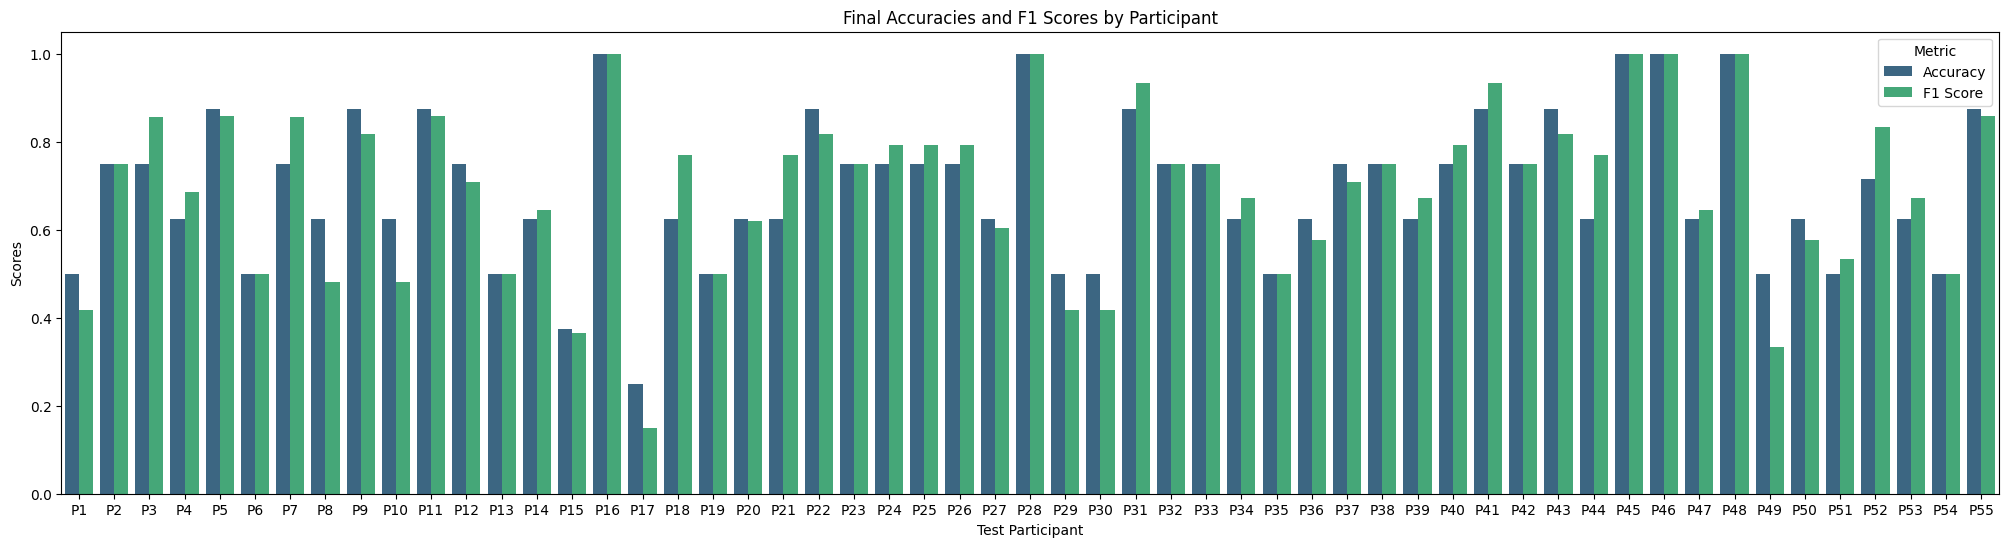

Avg Accuracy:  0.6948051948051949
Avg F1 Score:  0.6963538481720303


In [5]:
class_weights = {0:1, 1: 2}
reps = len(test_participants_all_codes)
final_accuracies = []
final_f1s = []
c = 2
seed = 1
tol = 1e-5
degree = 5
for i in range(1, reps+1):
    X_train, X_test, Y_train, Y_test = split_dataset(dataset, features, label, i)
    trained_model = train_svm_poly(
        features=features,
        label=label,
        preprocessor=preprocessor,
        train_x=X_train,
        train_y=Y_train,
        c=c,
        degree=degree,
        tol=tol,
        probability=True,
        class_weights=class_weights,
        seed=seed
    )

    predictions = predict(features, trained_model, X_test)
    accuracy, f1 = evaluate_full(label, predictions, Y_test)
    final_accuracies.append(accuracy)
    final_f1s.append(f1)

avg_accuracy = sum(final_accuracies) / reps
avg_f1 = sum(final_f1s) / reps

show_results(final_accuracies, final_f1s)
print(f"Avg Accuracy: ", avg_accuracy)
print(f"Avg F1 Score: ", avg_f1)